In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('application_data.csv')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.shape

(307511, 122)

In [5]:
df_nulls = df.isnull().sum()*100 / len(df)

In [6]:
df_nulls

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [7]:
null_df = df_nulls[df_nulls>0]
null_df

AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50

In [8]:
len(null_df)

67

##### So we found out there are total `67` columns containing null values but `occupation type` may be a useful attribute so dropping those columns who having null values more than `occupation type`

In [9]:
dropping_cols  = df_nulls[df_nulls>32]
dropping_cols.shape

(49,)

##### Now after considering about `occupation type` we still found more `49` columns with much null values hence decided to drop them

In [10]:
df.drop(columns=dropping_cols.keys(), inplace=True)

##### Now checking the updated shape of our dataframe

In [11]:
df.shape

(307511, 73)

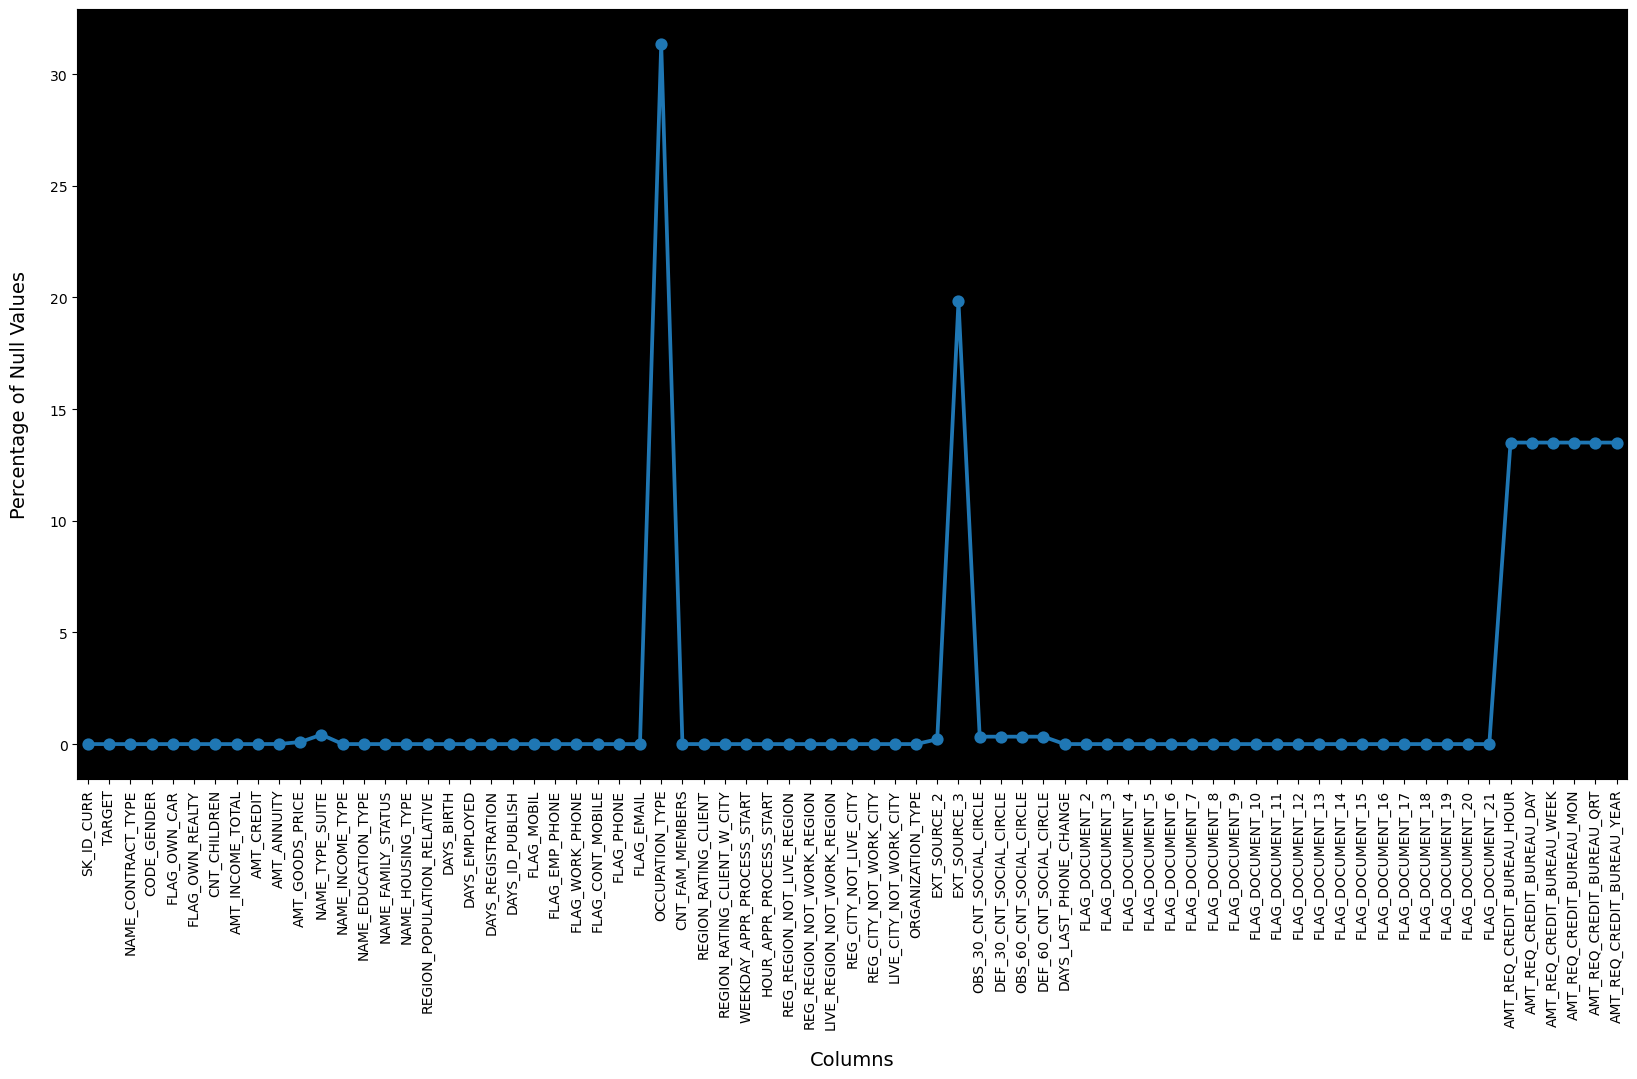

In [12]:
df_nulls = df.isnull().sum() * 100 / len(df)

df_nulls = df_nulls.reset_index()
df_nulls.columns = ['Column', 'Percentage']

plt.figure(figsize=(20, 10)) 
ax = sns.pointplot(x='Column', y='Percentage', data=df_nulls)

plt.xlabel('Columns', fontsize=14, labelpad=15)  
plt.ylabel('Percentage of Null Values', fontsize=14, labelpad=15)

plt.xticks(rotation=90)
ax.set_facecolor("k")
plt.show()

##### Again calculating the no of null values in columns

In [13]:
df.isnull().sum()[df.isnull().sum()>500]

NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [14]:
more_null_cols = df.isnull().sum()[df.isnull().sum()>500]

In [15]:
df.drop(columns = more_null_cols.keys()[2:] , inplace=True)

##### Now again checking current shape of our dataframe

In [16]:
df.shape

(307511, 61)

##### Now again checking total null values in columns

In [17]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [18]:
flag_cols = [col.strip() for col in df.columns if col.startswith("FLAG")][2:]

In [19]:
df.drop(columns=flag_cols,inplace=True)

##### Now after removing the unecesary flag named columns checking the shape of dataset

In [20]:
df.shape

(307511, 35)

##### After further analysis we found out `DAYS_LAST_PHONE_CHANGE` is not required hence dropping it

In [21]:
df.drop(columns=['DAYS_LAST_PHONE_CHANGE'],inplace=True)

In [22]:
df.shape

(307511, 34)

## Checking remaining columns

In [23]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')

In [24]:
df.isnull().sum()[df.isnull().sum()>0]

AMT_ANNUITY           12
AMT_GOODS_PRICE      278
NAME_TYPE_SUITE     1292
OCCUPATION_TYPE    96391
CNT_FAM_MEMBERS        2
dtype: int64

In [25]:
col_num = ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']
for col in col_num:
    print(col)
    print("Mean",df[col].mean())
    print("Median",df[col].median())
    print("Mode",df[col].mode(),'\n')

AMT_ANNUITY
Mean 27108.573909183444
Median 24903.0
Mode 0    9000.0
Name: AMT_ANNUITY, dtype: float64 

AMT_GOODS_PRICE
Mean 538396.2074288895
Median 450000.0
Mode 0    450000.0
Name: AMT_GOODS_PRICE, dtype: float64 

CNT_FAM_MEMBERS
Mean 2.152665450442101
Median 2.0
Mode 0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64 



## Handling Numerical Columns

##### Handling null values of `AMT_ANNUITY` with its median value 

In [26]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(),inplace=True)

##### Handling null values of `AMT_GOODS_PRICE` as `median` and `mode` holds the same `value`

In [27]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(),inplace=True)

##### Handling null values of `CNT_FAM_MEMBERS` with its median value 

In [28]:
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].median(),inplace=True)

## Handling Object Columns

##### Replacing the nan values in `NAME_TYPE_SUITE` with `Unaccompanied` and `OCCUPATION_TYPE` with `unknown`

In [29]:
df['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

In [30]:
df['OCCUPATION_TYPE'].fillna("unknown",inplace=True)

In [31]:
num_cols = df.select_dtypes(include=['number'])
negative_cols = num_cols.loc[:,(num_cols<0).any()].columns

print(negative_cols)

Index(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'], dtype='object')


In [32]:
for col in negative_cols:
    df[col] = abs(df[col])

In [33]:
avg_years = (365 + 365 + 365 + 366) /4
avg_years

365.25

In [34]:
df['Age'] = df['DAYS_BIRTH']//avg_years

##### Now as we know the age of the person hence we can drop the `DAYS_BIRTH` column

In [35]:
df.drop(columns=['DAYS_BIRTH'],inplace=True)

Analysing the age column

In [36]:
df['Age'].describe()

count    307511.000000
mean         43.405137
std          11.945779
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: Age, dtype: float64

## Finding out which age group has took maximum loans

In [37]:
df['Age_group'] = pd.cut(df['Age'], bins= np.linspace(20,70,6))

In [38]:
df['Age_group'].value_counts()

Age_group
(30.0, 40.0]    83212
(40.0, 50.0]    74347
(50.0, 60.0]    67864
(20.0, 30.0]    52963
(60.0, 70.0]    29124
Name: count, dtype: int64

## Separating Numerical and Non numerical columns

In [39]:
numerical_df   = df.select_dtypes(include=['int','float'])
numerical_cols = numerical_df.columns

numerical_df.head(3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,Age
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,25.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,45.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,52.0


In [40]:
categoircal_df   = df.select_dtypes(exclude='number')
categoircal_cols = categoircal_df.columns

categoircal_df.head(3)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,Age_group
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,"(20.0, 30.0]"
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,"(40.0, 50.0]"
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,"(50.0, 60.0]"


In [41]:
print("Dataframe shape"  ,df.shape)
print("Numerical shape"  ,numerical_df.shape)
print("Categorical shape",categoircal_df.shape)

Dataframe shape (307511, 35)
Numerical shape (307511, 22)
Categorical shape (307511, 13)


In [42]:
numerical_desc = numerical_df.describe()
numerical_desc

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,Age
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383962e+05,0.020868,67724.742149,4986.120328,2994.202373,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,43.405137
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692794e+05,0.013831,139443.751806,3522.886321,1509.450419,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,11.945779
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,933.000000,2010.000000,1720.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,2219.000000,4504.000000,3254.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,5707.000000,7479.500000,4299.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,365243.000000,24672.000000,7197.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.000000


In [43]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CNT_CHILDREN                 307511 non-null  int64  
 3   AMT_INCOME_TOTAL             307511 non-null  float64
 4   AMT_CREDIT                   307511 non-null  float64
 5   AMT_ANNUITY                  307511 non-null  float64
 6   AMT_GOODS_PRICE              307511 non-null  float64
 7   REGION_POPULATION_RELATIVE   307511 non-null  float64
 8   DAYS_EMPLOYED                307511 non-null  int64  
 9   DAYS_REGISTRATION            307511 non-null  float64
 10  DAYS_ID_PUBLISH              307511 non-null  int64  
 11  CNT_FAM_MEMBERS              307511 non-null  float64
 12  REGION_RATING_CLIENT         307511 non-null  int64  
 13 

In [44]:
numerical_df['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

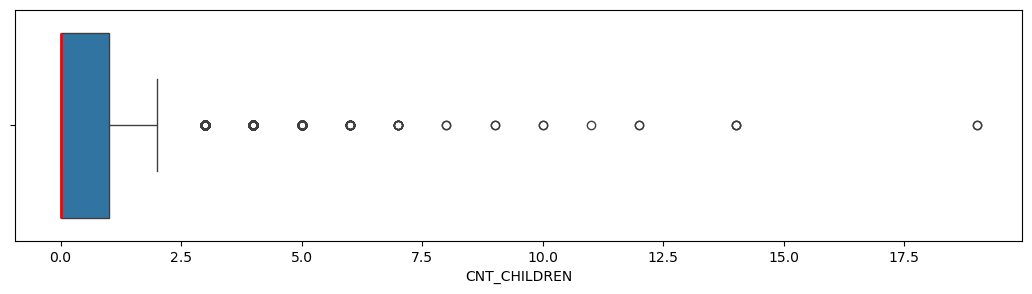

In [45]:
plt.figure(figsize = (13,3))
sns.boxplot(data=numerical_df , x = numerical_df['CNT_CHILDREN'] , medianprops={'color': 'red', 'linewidth': 2})
plt.show()

In [46]:
print(numerical_df['CNT_CHILDREN'].quantile(0.99))
print('Number of values with rows more than 99 percentile:' ,len(numerical_df[numerical_df['CNT_CHILDREN']>3]))

3.0
Number of values with rows more than 99 percentile: 555


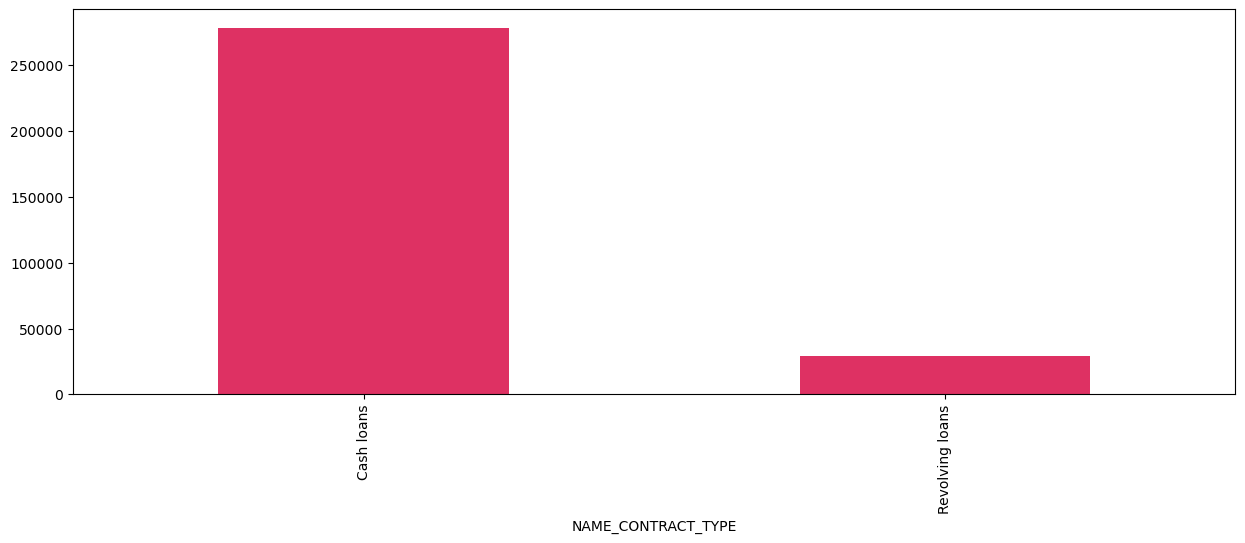

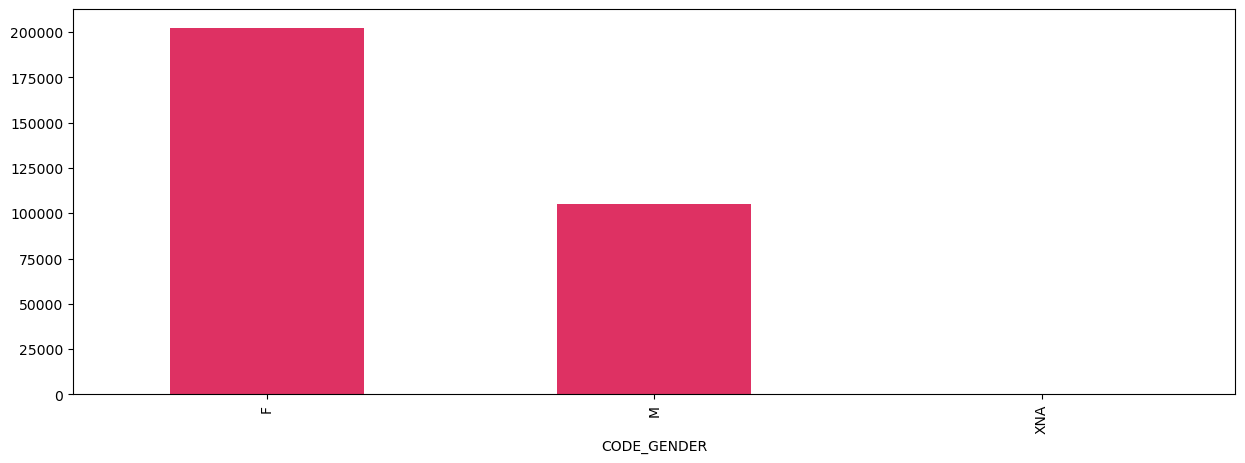

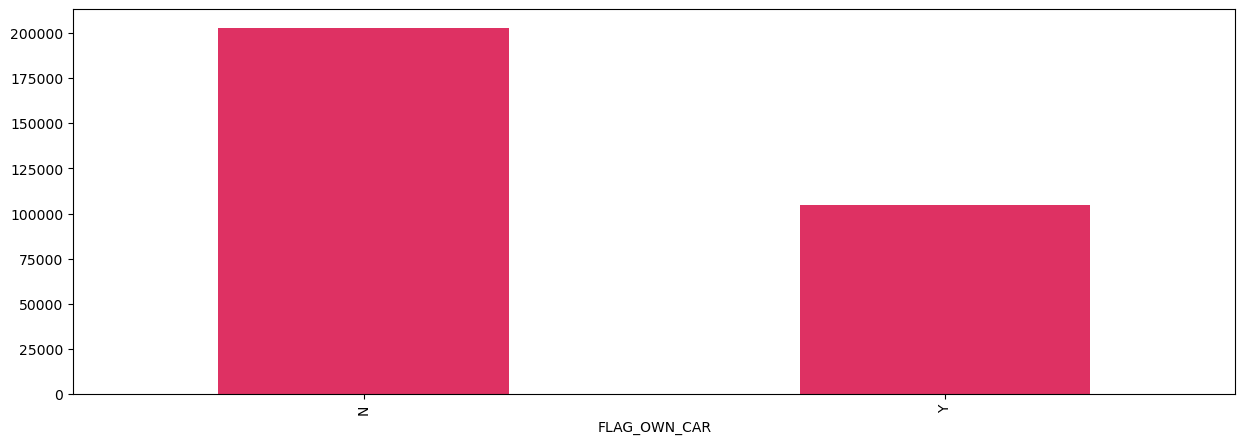

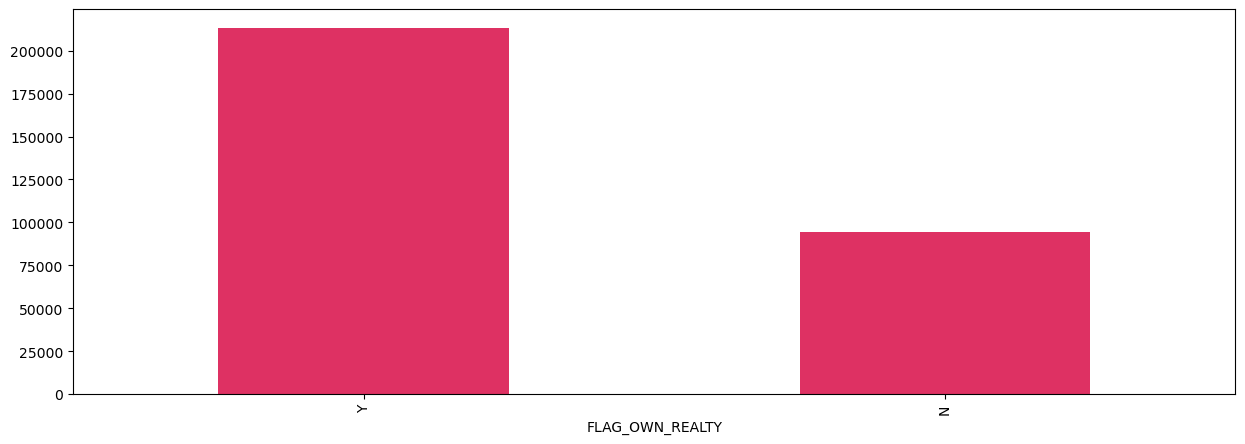

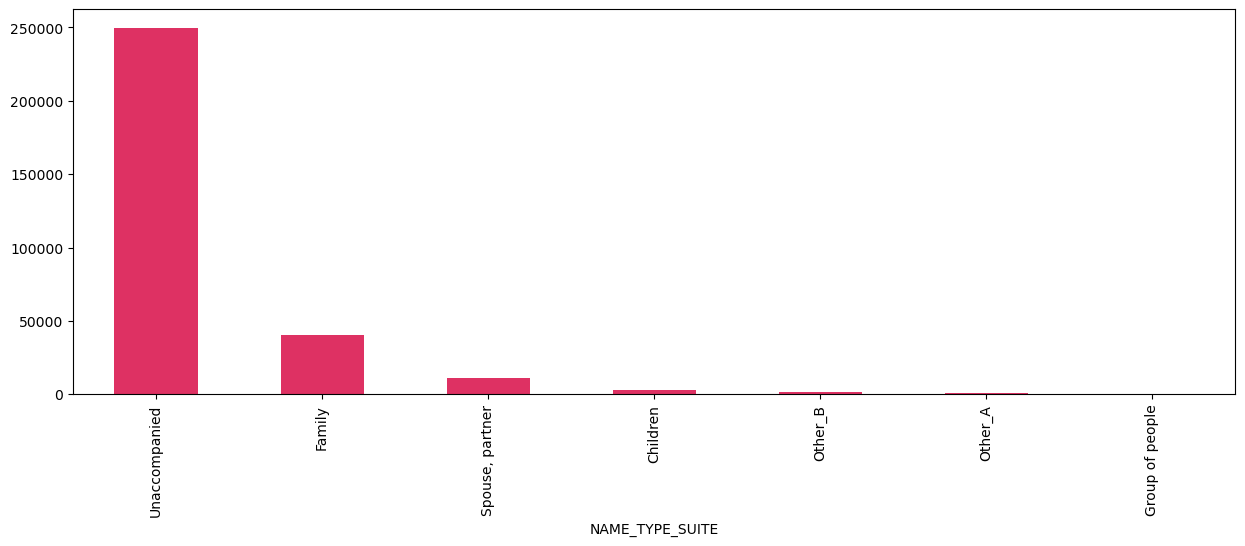

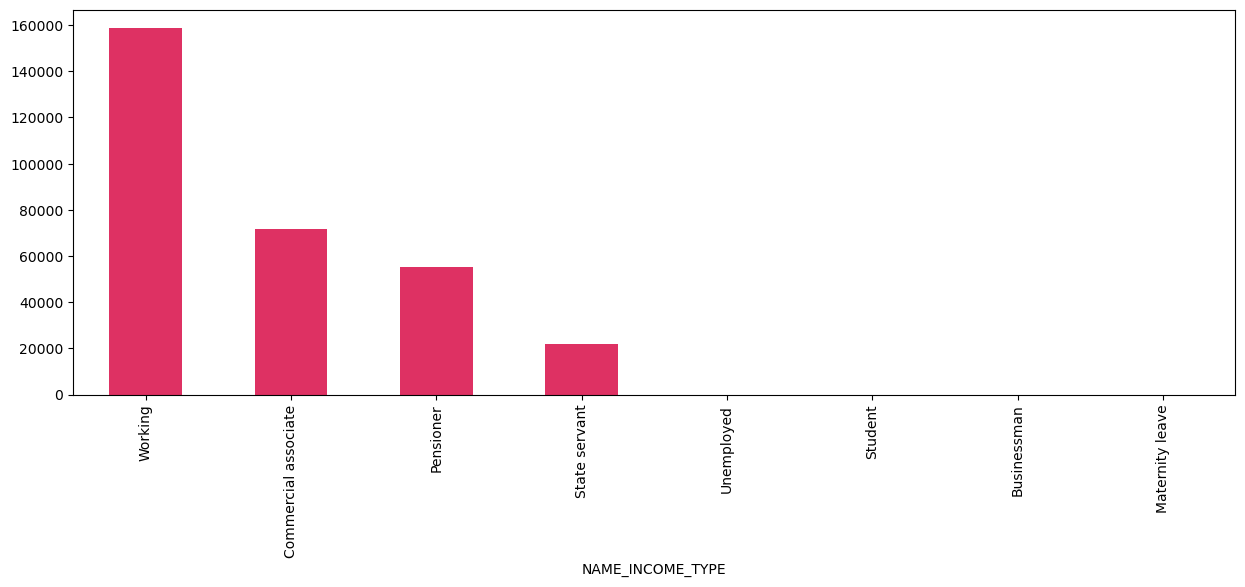

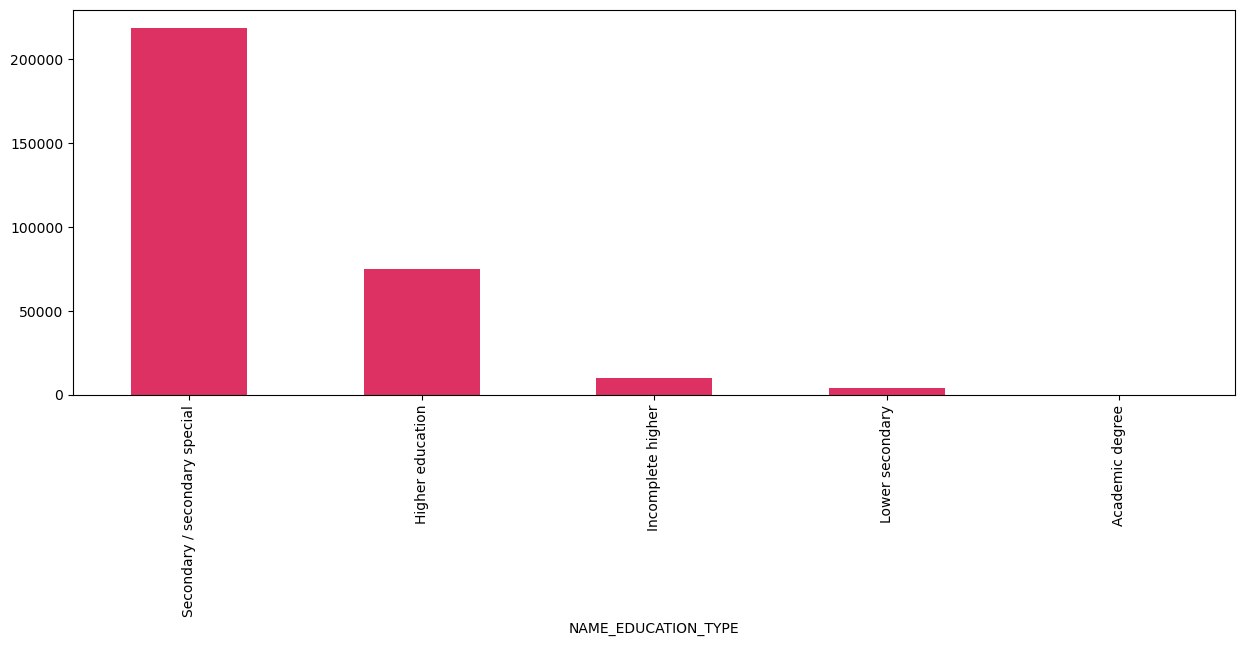

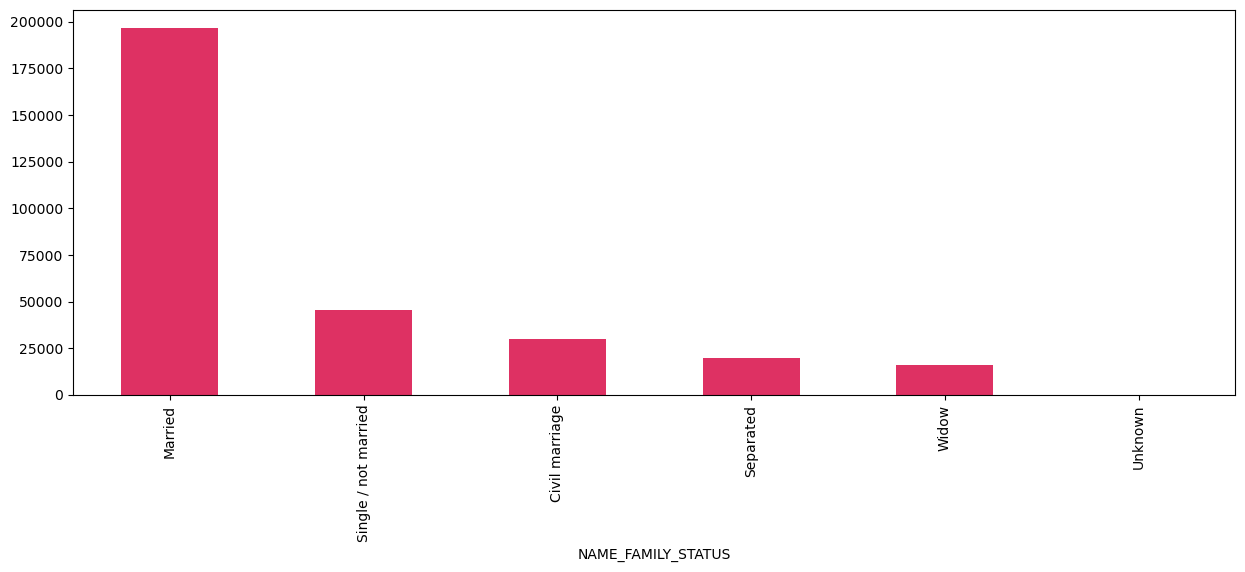

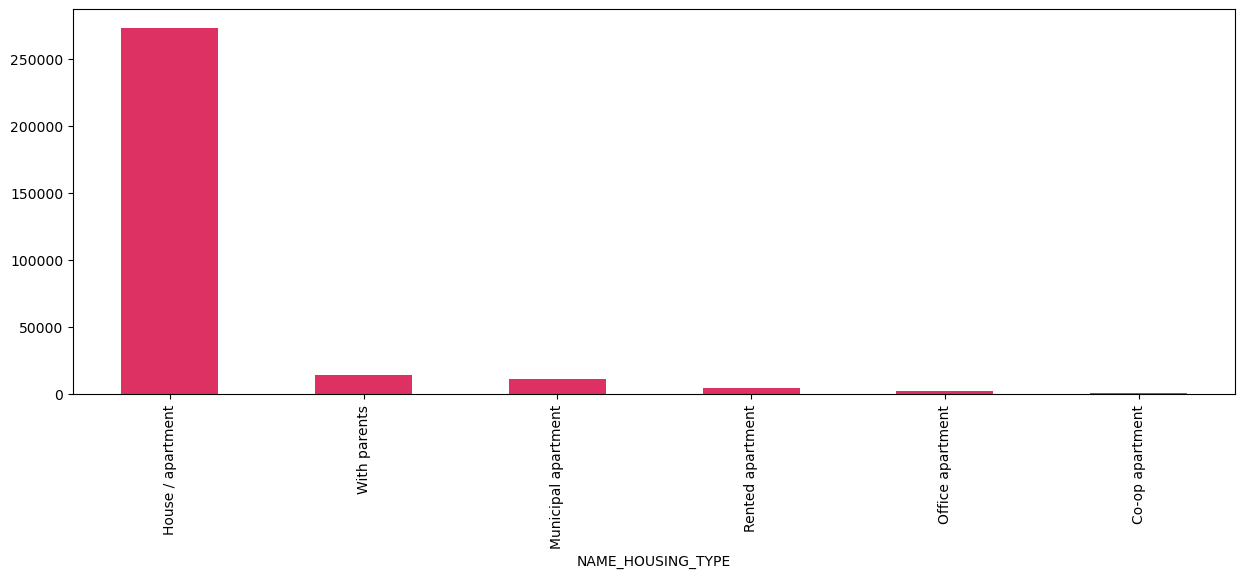

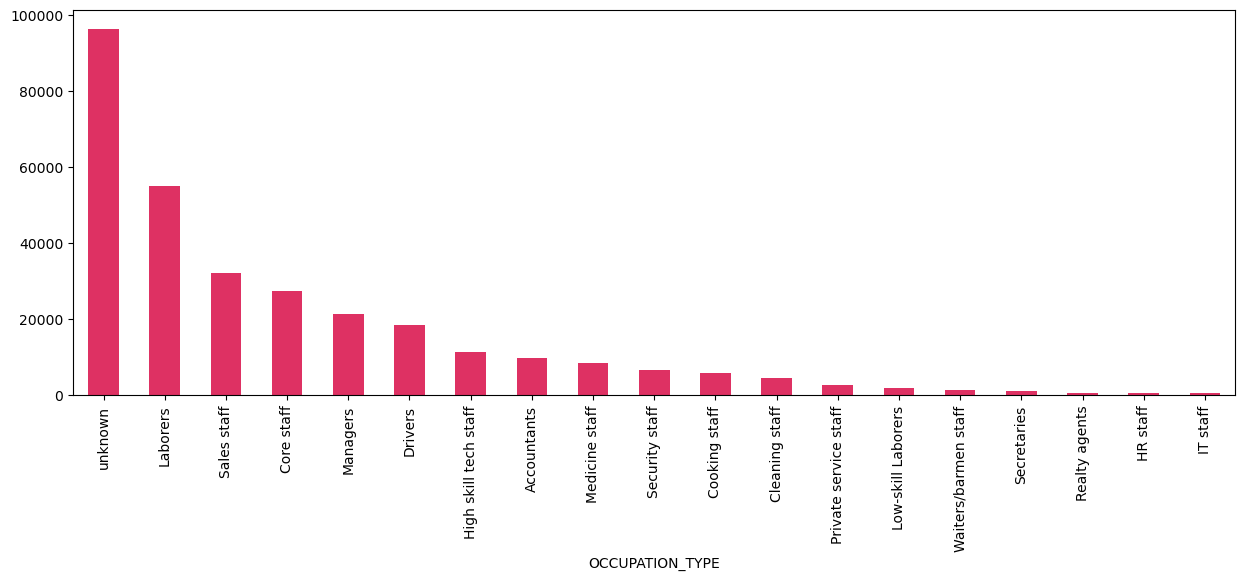

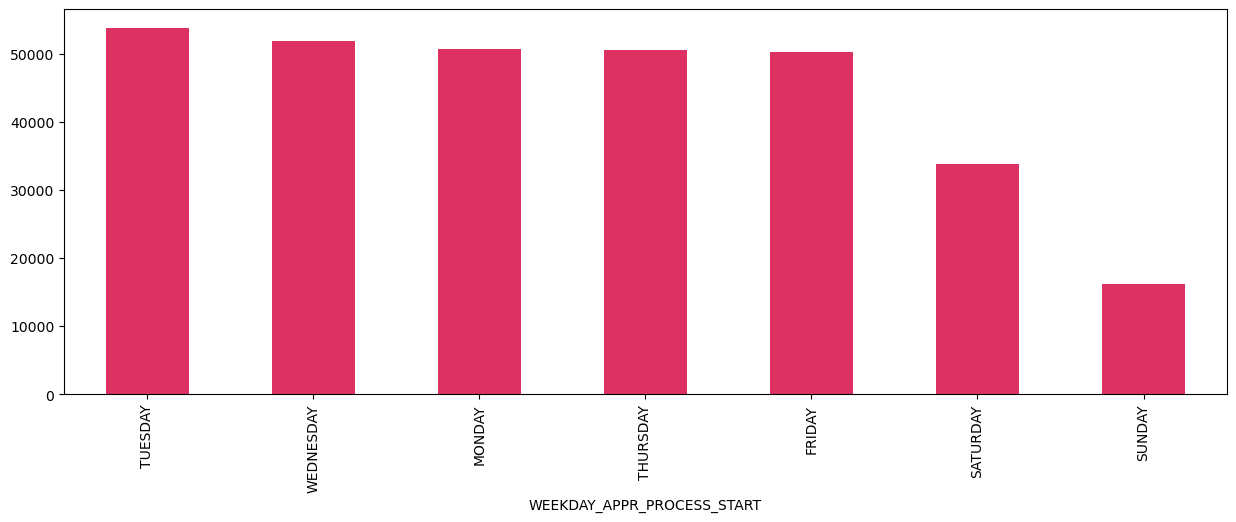

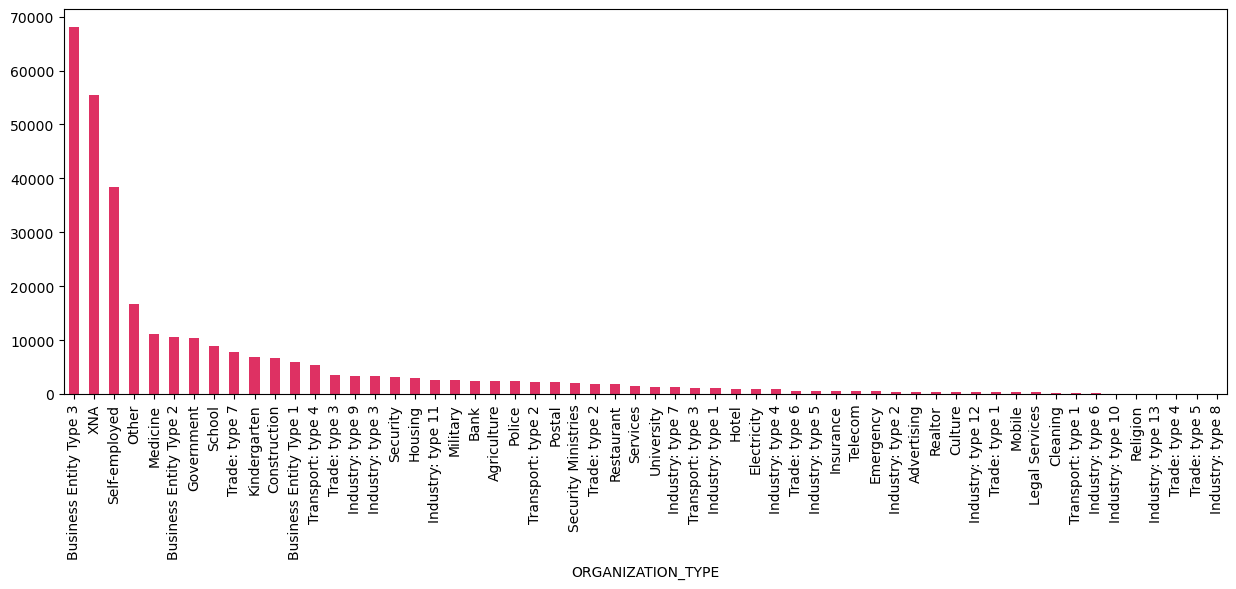

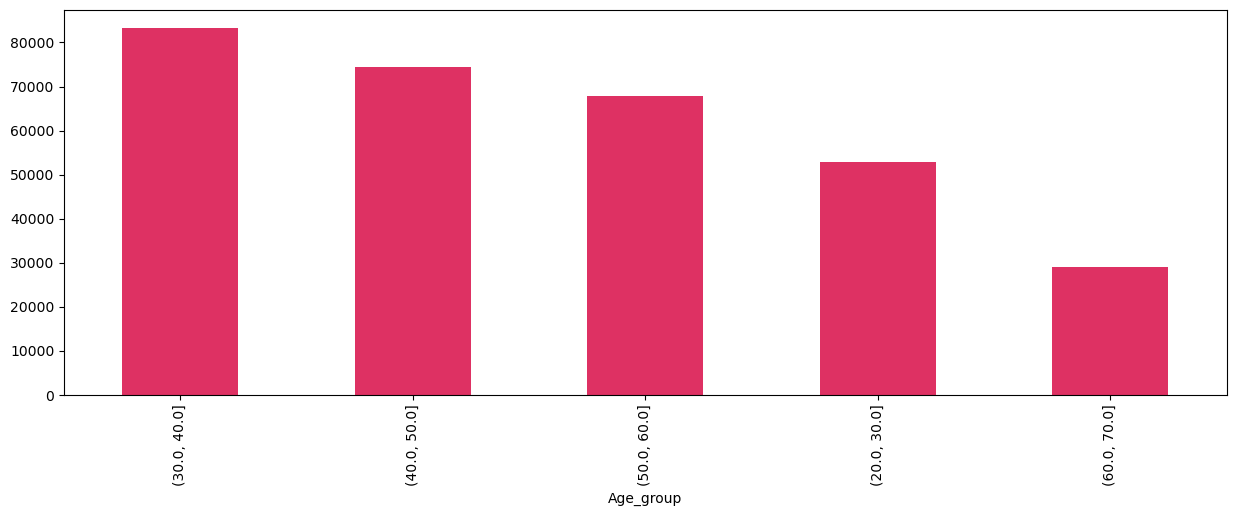

In [47]:
for col in categoircal_cols:
    plt.figure(figsize=(15,5))
    categoircal_df[col].value_counts().plot(kind='bar' , color='#DE3163')
    plt.show()

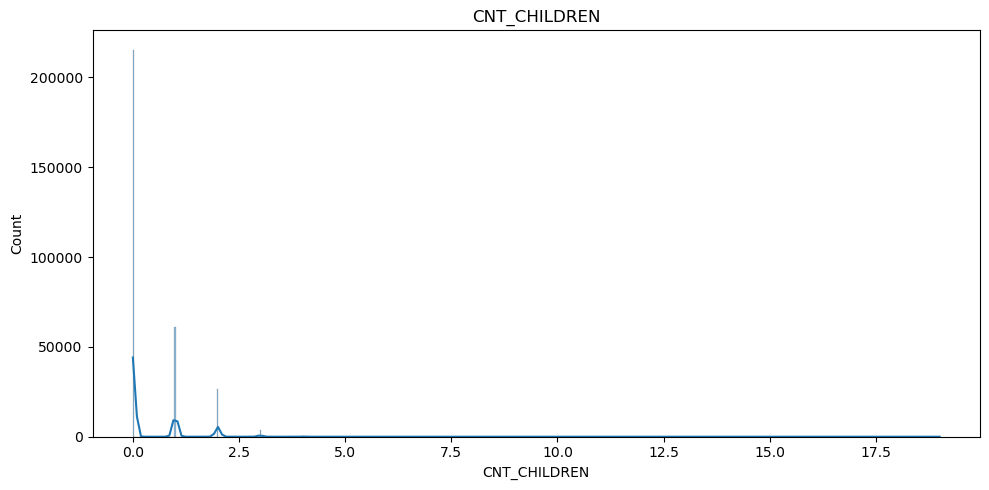

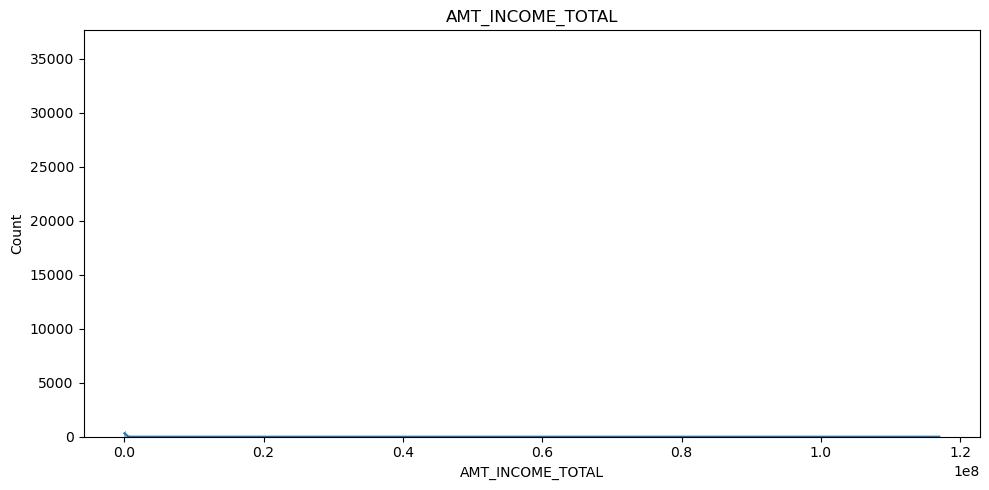

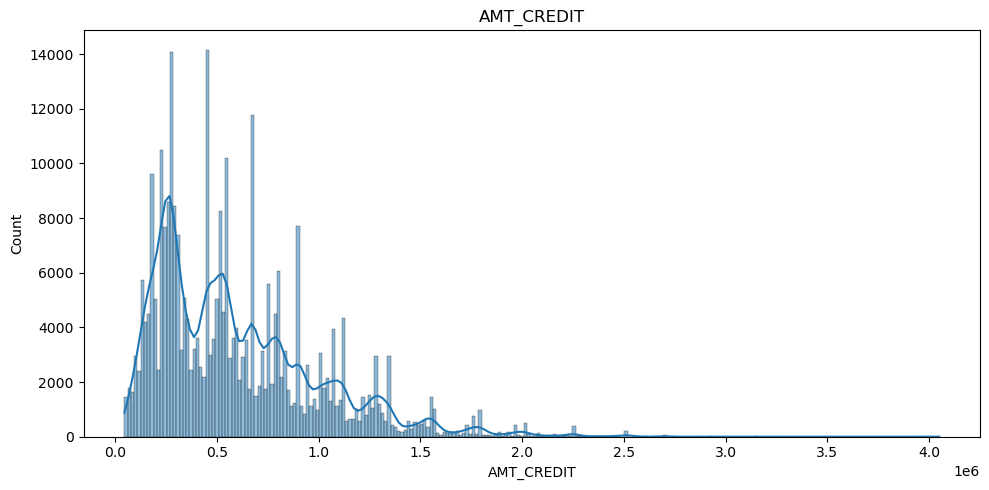

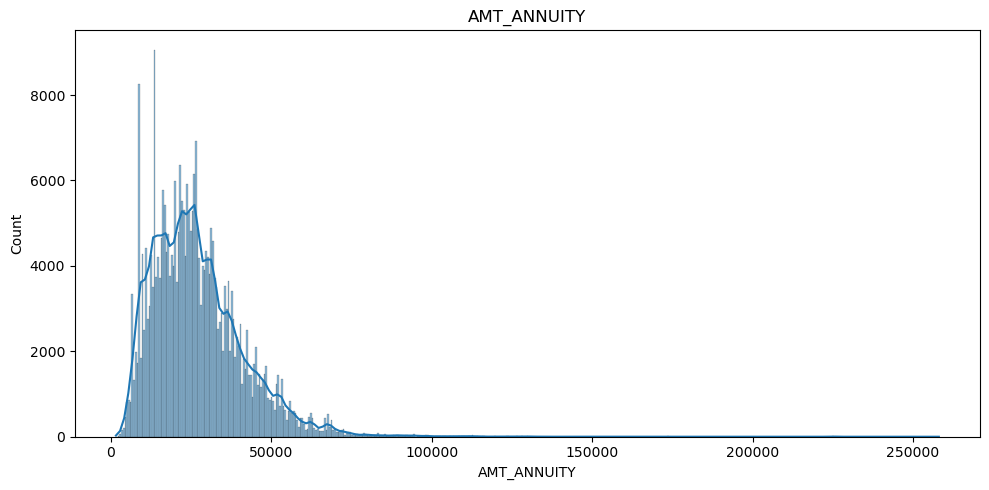

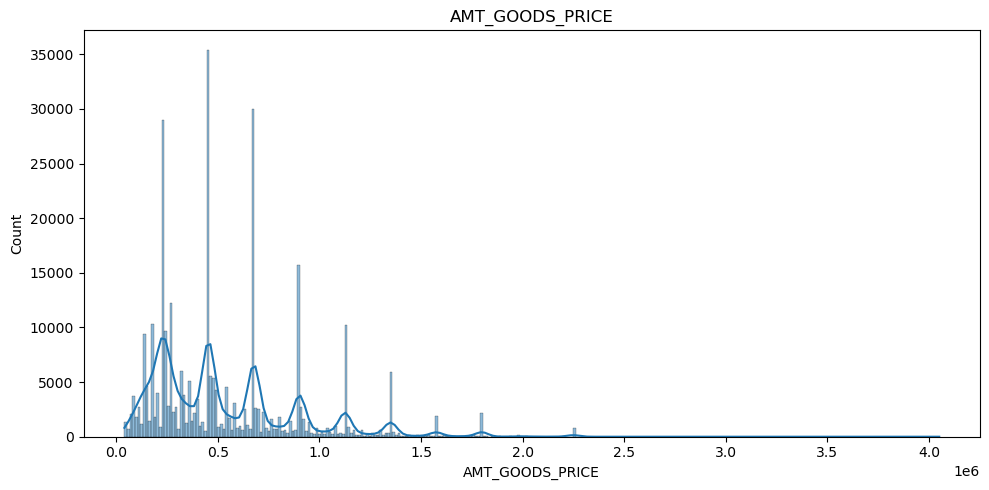

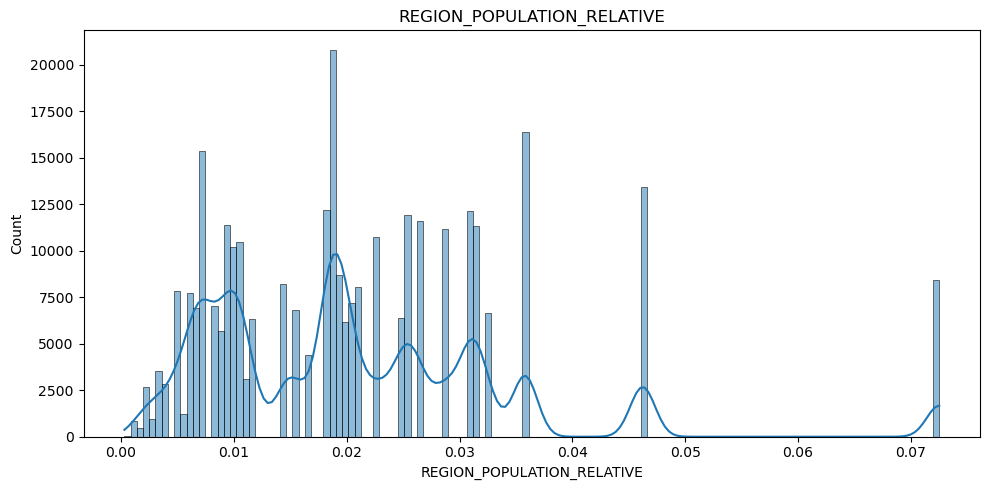

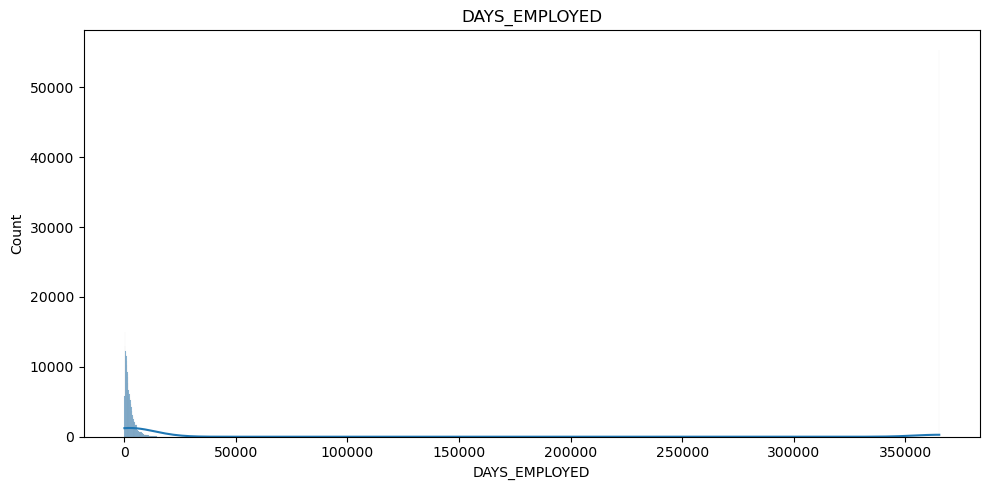

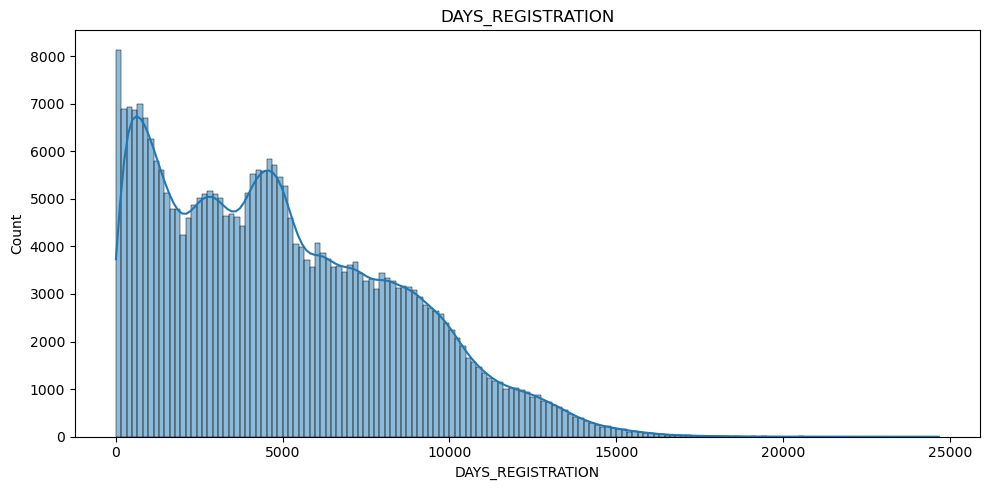

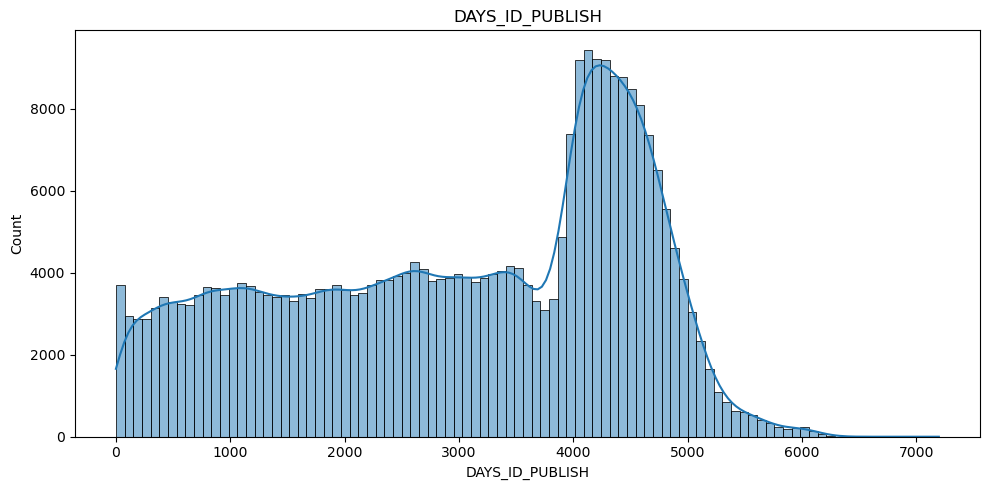

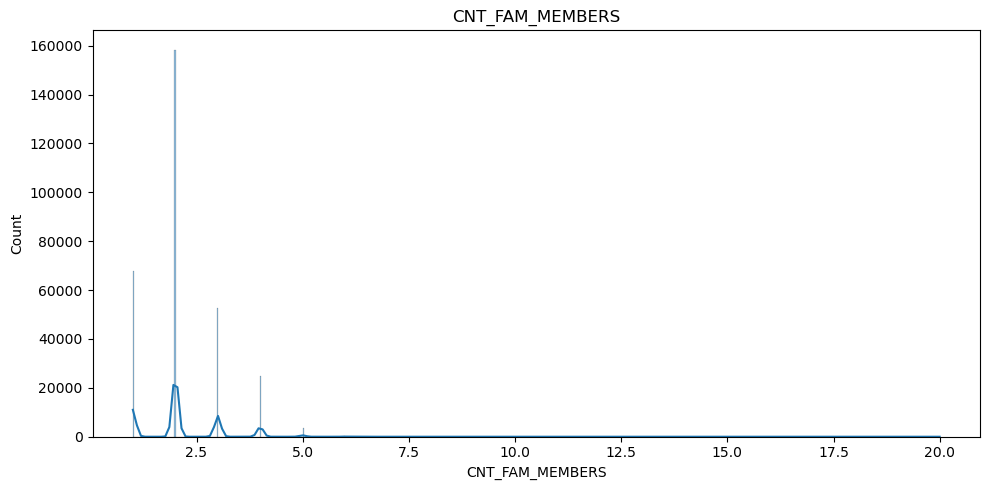

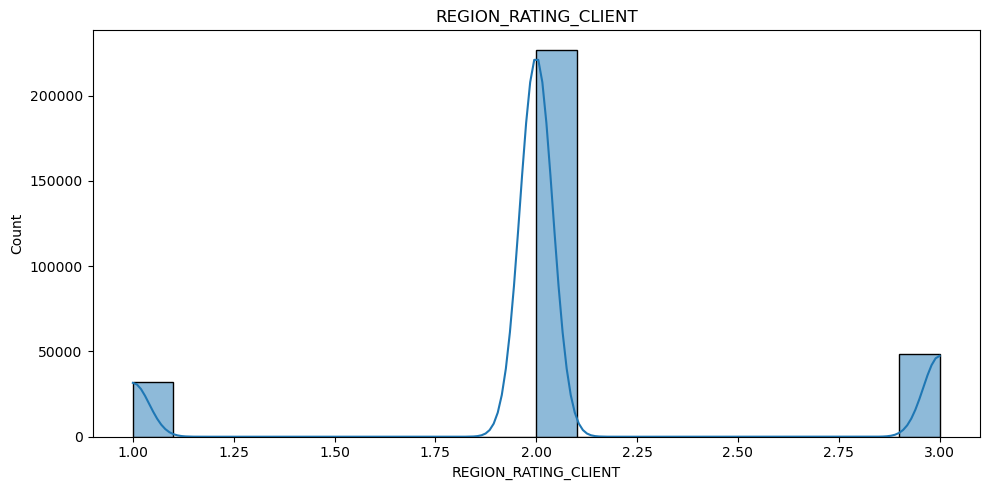

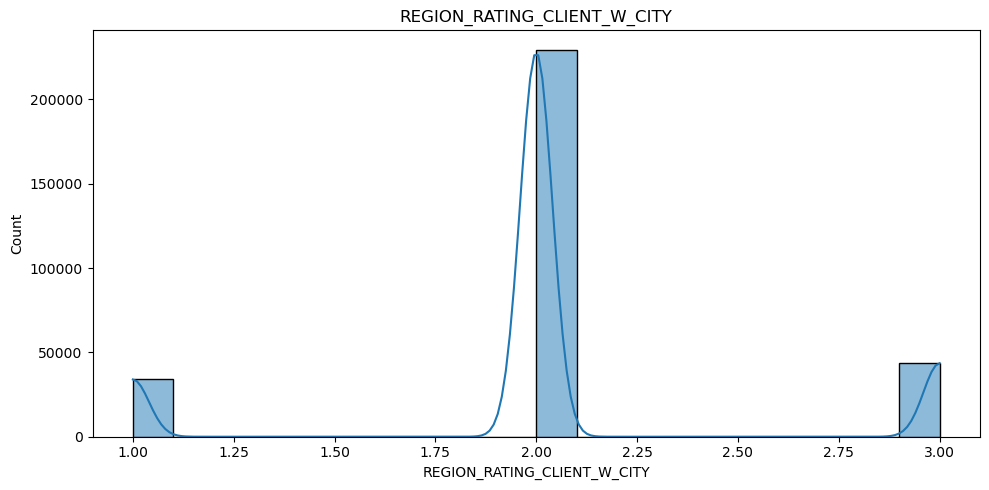

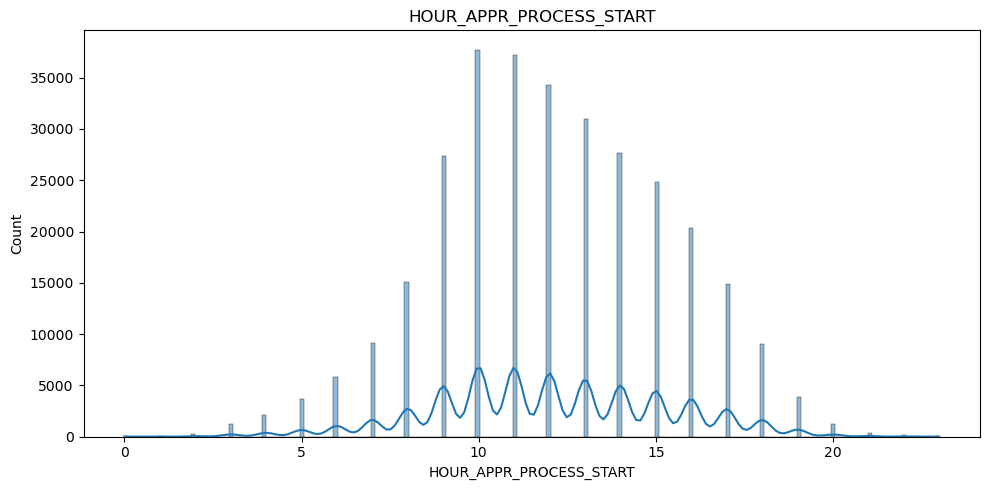

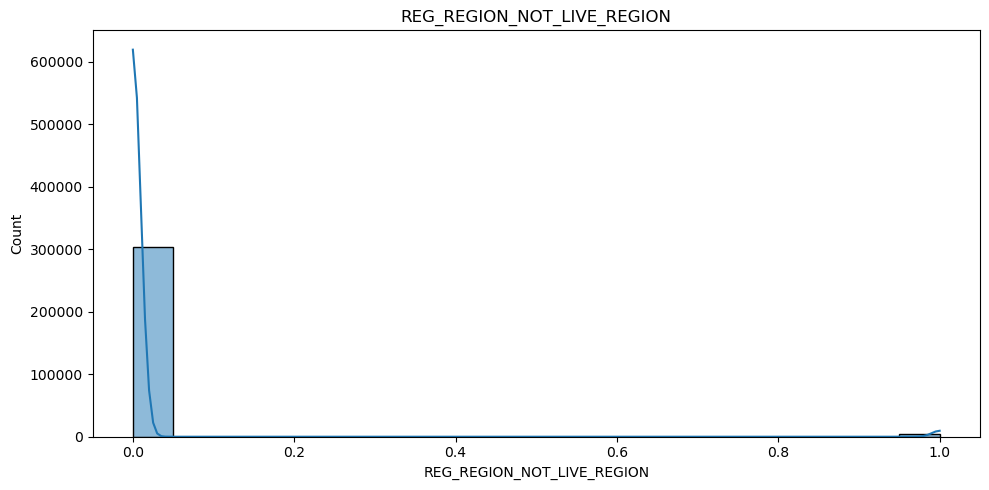

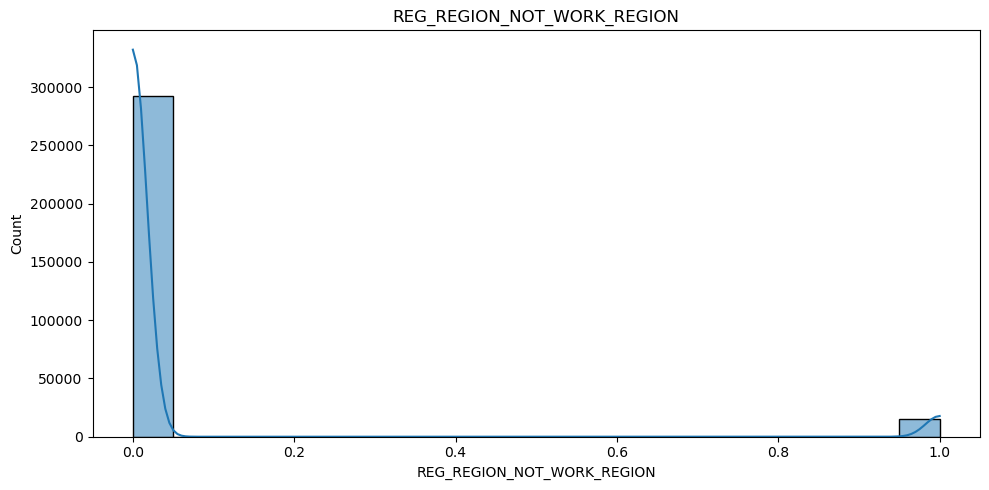

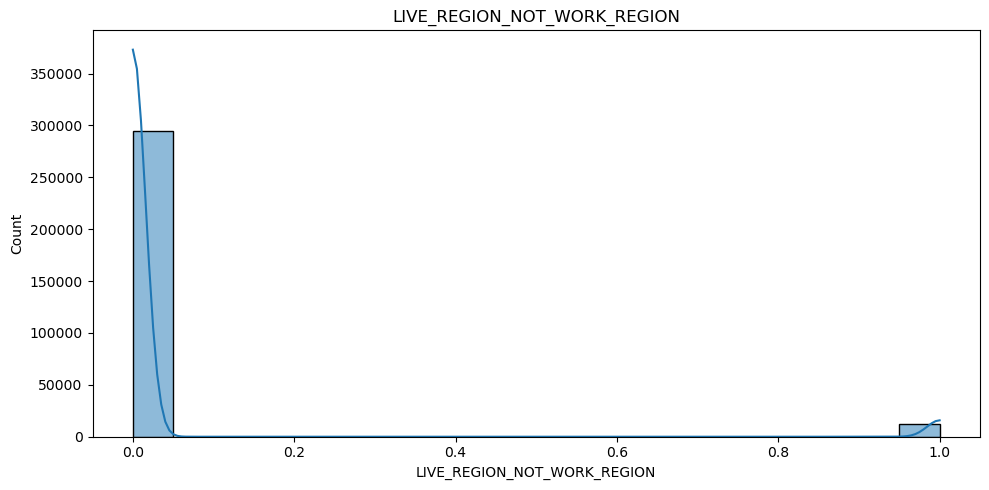

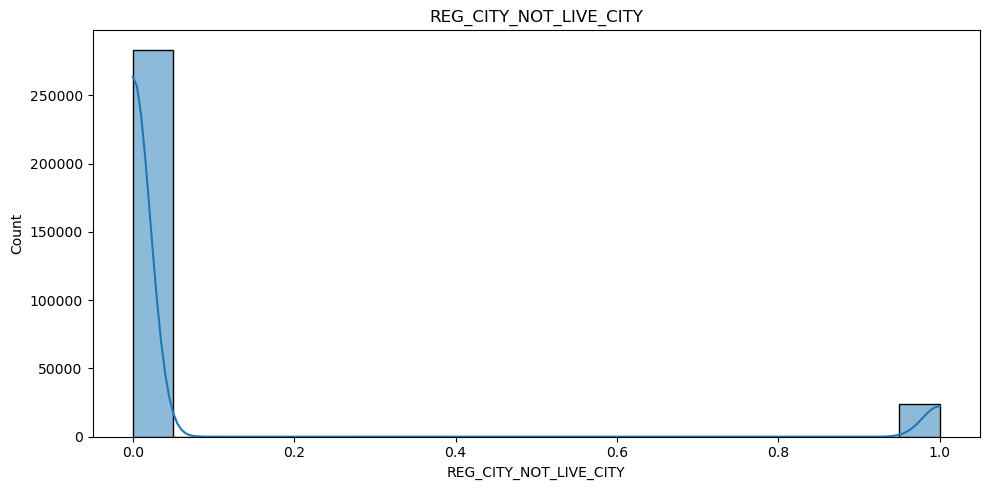

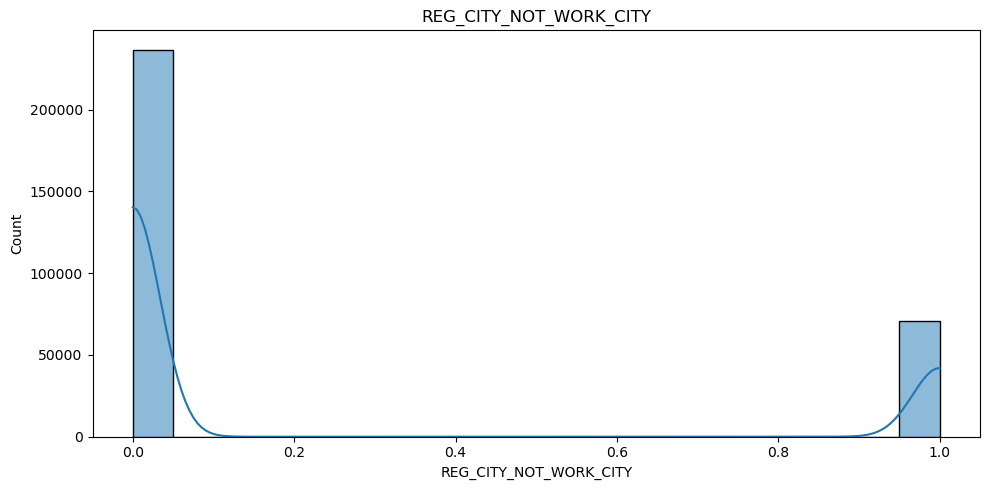

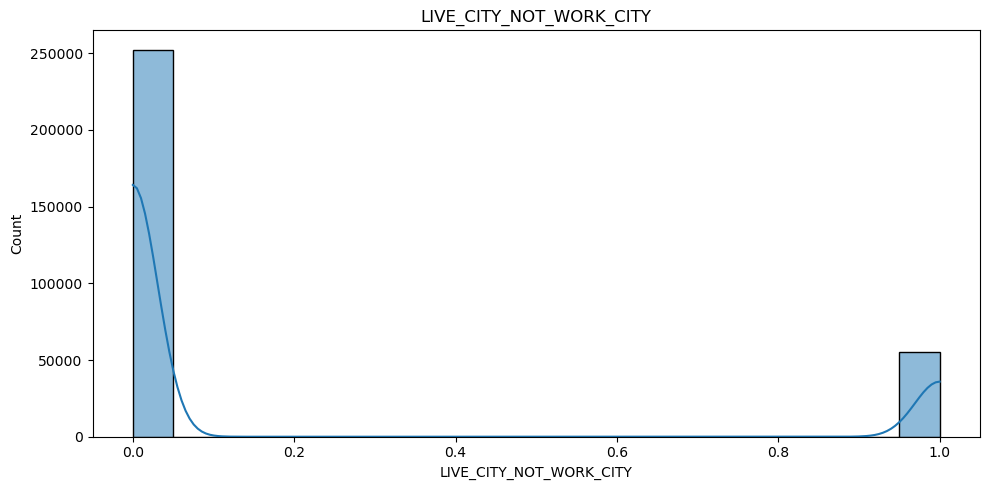

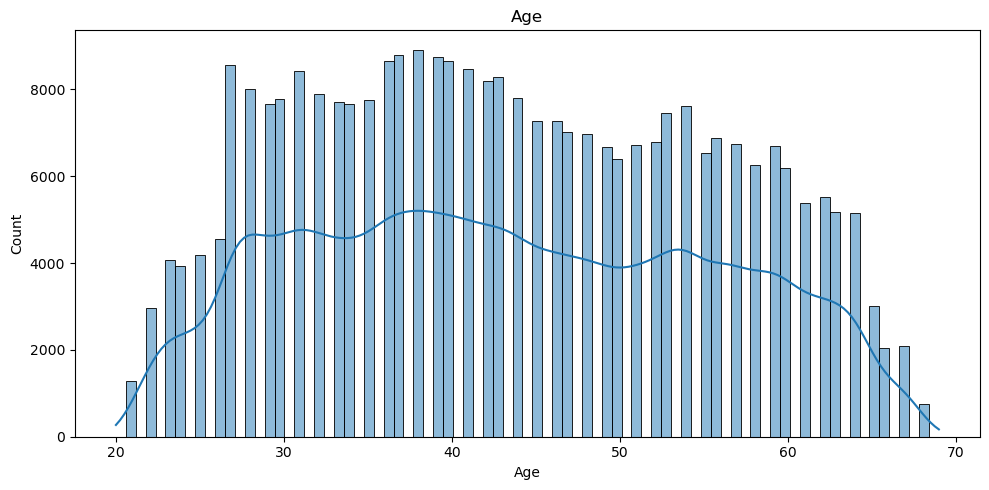

In [48]:
for col in numerical_cols[2:]:
    plt.figure(figsize=(10,5))
    sns.histplot(data = numerical_df , x = numerical_df[col], kde=True)
    plt.title(col)
    plt.tight_layout()
    plt.show()